In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,accuracy_score,make_scorer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

### Loading the dataset

In [ ]:
# Read in the CSV files
comments_df = pd.read_csv('/content/Top_Posts_Comments.csv')
posts_df = pd.read_csv('/content/Top_Posts.csv')

# Merging two dataset

In [ ]:
# Merge the two dataframes based on the "post_id" column
merged_df = pd.merge(posts_df, comments_df, on='post_id')
merged_df.head()

,post_id,post_title,subreddit,post_url,flair_text,score,comments,upvote_ratio,date-time,year,comment
0,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,Twitter thread: [https://twitter.com/cyrildiag...
1,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,The future 🤯
2,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,Simple yet very useful. Thank you for sharing ...
3,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,"Almost guaranteed, Apple will copy your idea i..."
4,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,Ohh the nightmare of making this into a stable...


In [ ]:
# Performing Exploratory Data Analysis
merged_df.shape

(223168, 11)

In [ ]:
# Removing missing value from the comments
merged_df=merged_df.dropna()

In [ ]:
merged_df.shape

(198427, 11)

In [ ]:
# Data Cleaning
# Remove stopwords from comments column
nltk.download('stopwords')
nltk.download('punkt')
# Convert all values in the 'comments' column to strings
merged_df['comment'] = merged_df['comment'].astype(str)
stop_words = set(stopwords.words('english'))
merged_df['comment'] = merged_df['comment'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
merged_df.head()

,post_id,post_title,subreddit,post_url,flair_text,score,comments,upvote_ratio,date-time,year,comment
0,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,Twitter thread : [ https : //twitter.com/cyril...
1,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,future 🤯
2,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,Simple yet useful . Thank sharing code .
3,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,"Almost guaranteed , Apple copy idea 3 , 2 , 1 ..."
4,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,Ohh nightmare making stable product ... Enough...


#### Defining the feature and target variable

In [ ]:
# Define the features and target
X = merged_df['comment']
y = merged_df['subreddit']

### Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### Convert text data to numerical data using TF-IDF vectorization

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


## Naive Bayes

In [ ]:
# Train a Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
# Make predictions on the testing set
y_pred = nb.predict(X_test_tfidf)

In [ ]:
# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

MachineLearning       0.71      0.71      0.71     17298
     artificial       0.50      0.00      0.00      2642
    datascience       0.74      0.84      0.79     19746

       accuracy                           0.73     39686
      macro avg       0.65      0.52      0.50     39686
   weighted avg       0.71      0.73      0.70     39686

[[12216     3  5079]
 [ 1810     3   829]
 [ 3080     0 16666]]


In [ ]:
acc_nb=accuracy_score(y_test, y_pred)
print('Accuracy:', acc_nb*100,"%")

Accuracy: 72.78385324799677 %


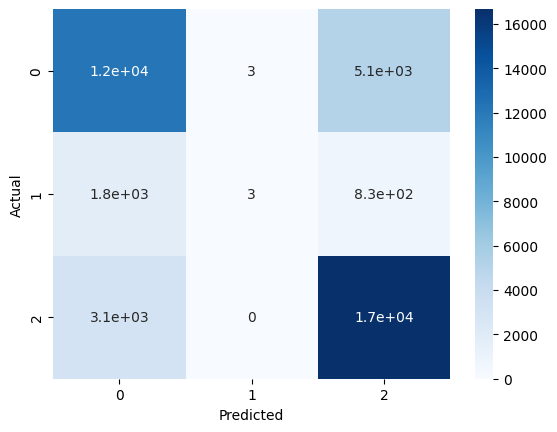

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Train the hyperparameter-tuned Multinomial Naive Bayes model using grid search
nb_model = MultinomialNB()
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
    'fit_prior': [True, False]
}

In [ ]:
scorer_nb = make_scorer(accuracy_score)
grid_search_nb = GridSearchCV(nb_model, param_grid=param_grid_nb, scoring=scorer_nb, cv=5)
grid_search_nb.fit(X_train_tfidf, y_train)
best_nb_model = MultinomialNB(**grid_search_nb.best_params_)
best_nb_model.fit(X_train_tfidf, y_train)
y_pred_nb_tuned = best_nb_model.predict(X_test_tfidf)

In [ ]:
# Calculate the accuracy score of the hyperparameter-tuned Multinomial Naive Bayes model
acc_tuned_nb = accuracy_score(y_test, y_pred_nb_tuned)

In [ ]:
# Create a bar chart to compare the accuracy scores of the models
models = ['Default Naive Bayes', 'Hyperparameter-tuned Multinomial Naive Bayes']
accuracy_scores = [acc_nb, acc_tuned_nb]

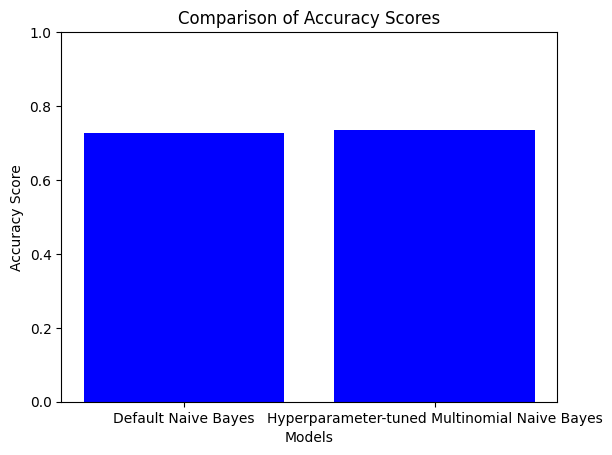

In [ ]:
plt.bar(models, accuracy_scores, color='blue')
plt.title('Comparison of Accuracy Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim([0, 1])
plt.show()

In [ ]:
# Print the accuracy scores of the models
print("Accuracy score of the default decision tree model:", acc_nb)
print("Accuracy score of the hyperparameter-tuned Multinomial Naive Bayes model:", acc_tuned_nb)

Accuracy score of the default decision tree model: 0.7278385324799678
Accuracy score of the hyperparameter-tuned Multinomial Naive Bayes model: 0.734818323842161


## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# train a Decision Tree classifier on the dataset
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# make predictions on the test set
y_pred_dt = dt_model.predict(X_test_tfidf)

In [ ]:
# evaluate the performance of the model
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", dt_model.score(X_test_tfidf, y_test)*100,"%")


[[11482   779  5037]
 [ 1514   337   791]
 [ 5562   386 13798]]
                 precision    recall  f1-score   support

MachineLearning       0.62      0.66      0.64     17298
     artificial       0.22      0.13      0.16      2642
    datascience       0.70      0.70      0.70     19746

       accuracy                           0.65     39686
      macro avg       0.52      0.50      0.50     39686
   weighted avg       0.63      0.65      0.64     39686

Accuracy: 64.54921130877388 %


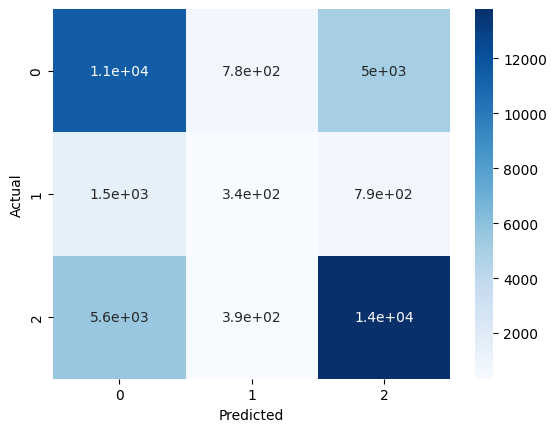

In [ ]:
cm=confusion_matrix(y_test, y_pred_dt)
# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Define the decision tree classifier
dt_model2 = DecisionTreeClassifier(random_state=42)

# Define the search space for hyperparameters
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


In [ ]:
# Define the evaluation metric
scorer = make_scorer(accuracy_score)


In [ ]:
# Define the grid search object
grid_search = GridSearchCV(dt_model2, param_grid=param_grid, scoring=scorer, cv=5)

In [ ]:
# Fit the grid search object to the training data
grid_search.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(accuracy_score))

In [ ]:
# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best accuracy score:  0.576209056045801


In [ ]:
# Use the best hyperparameters to train a new model
best_dt_model = DecisionTreeClassifier(random_state=42, **grid_search.best_params_)
best_dt_model.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_dt = best_dt_model.predict(X_test_tfidf)
# Accuracy scores
print("Accuracy:", best_dt_model.score(X_test_tfidf, y_test)*100,"%")

Accuracy: 57.23680895025953 %


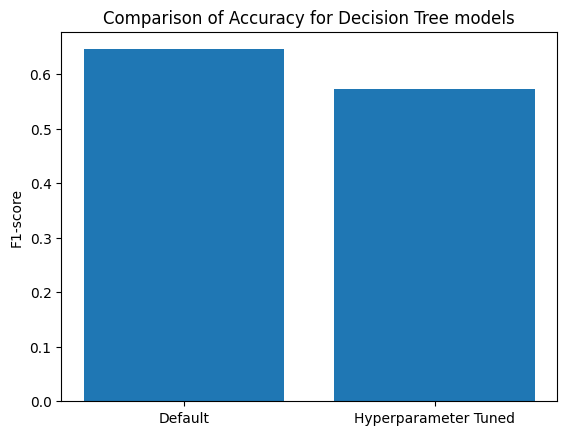

In [ ]:
# Create a graph to visualize the Accuracy for both models
fig, ax = plt.subplots()
models = ['Default', 'Hyperparameter Tuned']
Accuracy_dt = [dt_model.score(X_test_tfidf, y_test), best_dt_model.score(X_test_tfidf, y_test)]
ax.bar(models, Accuracy_dt)
plt.ylabel('F1-score')
plt.title('Comparison of Accuracy for Decision Tree models')
plt.show()

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# create a Logistic Regression model
lr_model = LogisticRegression()

In [ ]:
# train the model on the training data
lr_model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# make predictions on the test set
y_pred_lr = lr_model.predict(X_test_tfidf)

In [ ]:
# evaluate the performance of the model
cm_lr = confusion_matrix(y_test, y_pred_lr)
cr_lr = classification_report(y_test, y_pred_lr)
accuracy_lr = lr_model.score(X_test_tfidf, y_test)
print(cm_lr)
print(cr_lr)
print("The accuracy for the logistic regression is",accuracy_lr)


[[12542   195  4561]
 [ 1657   271   714]
 [ 3408    59 16279]]
                 precision    recall  f1-score   support

MachineLearning       0.71      0.73      0.72     17298
     artificial       0.52      0.10      0.17      2642
    datascience       0.76      0.82      0.79     19746

       accuracy                           0.73     39686
      macro avg       0.66      0.55      0.56     39686
   weighted avg       0.72      0.73      0.72     39686

The accuracy for the logistic regression is 0.733054477649549


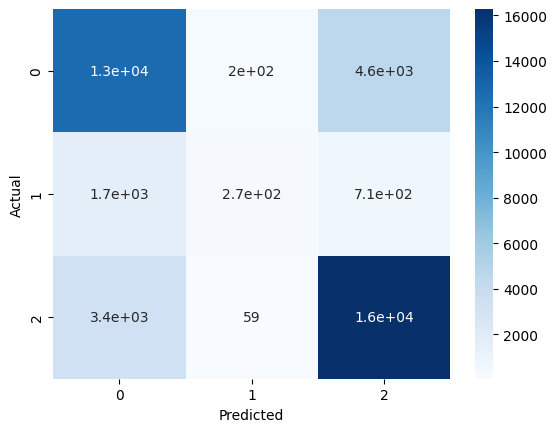

In [ ]:
# Create heatmap of confusion matrix
sns.heatmap(cm_lr, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Train the default Logistic Regression model on the dataset
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_tfidf, y_train)

# Train the hyperparameter-tuned Logistic Regression model on the dataset
# Define the search space for hyperparameters
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.5, 1.0, 1.5, 2.0],
    'solver': ['liblinear', 'saga']
}

In [ ]:
# Evaluate the performance of the default Logistic Regression model
y_pred_lr_default = lr_model.predict(X_test_tfidf)
acc_lr_default = accuracy_score(y_test, y_pred_lr_default)

In [ ]:
lr_model_tuned = GridSearchCV(LogisticRegression(random_state=42), param_grid=param_grid_lr, cv=5)
lr_model_tuned.fit(X_train_tfidf, y_train)

In [ ]:
# Evaluate the performance of the hyperparameter-tuned Logistic Regression model
y_pred_lr_tuned = lr_model_tuned.predict(X_test_tfidf)
acc_lr_tuned = accuracy_score(y_test, y_pred_lr_tuned)

In [ ]:
# Compare the accuracy scores of the models
print('Accuracy score of the default Logistic Regression model:', acc_lr_default)
print('Accuracy score of the hyperparameter-tuned Logistic Regression model:', acc_lr_tuned)

Accuracy score of the default Logistic Regression model: 0.733054477649549
Accuracy score of the hyperparameter-tuned Logistic Regression model: 0.7388751700851686


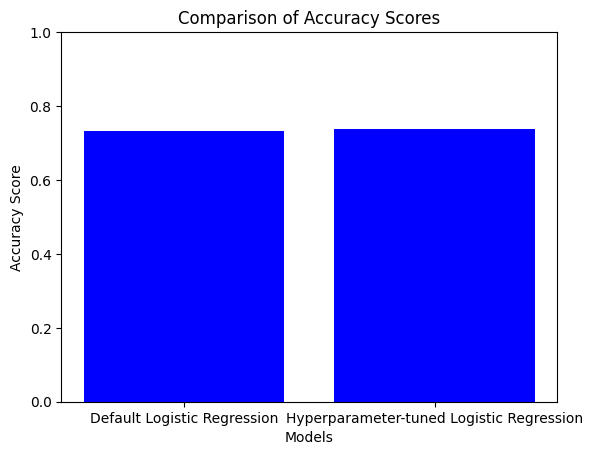

In [ ]:
# Create a bar chart to compare the accuracy of the models
models = ['Default Logistic Regression', 'Hyperparameter-tuned Logistic Regression']
accuracy_scores = [acc_lr_default, acc_lr_tuned]

plt.bar(models, accuracy_scores, color='blue')
plt.title('Comparison of Accuracy Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim([0, 1])
plt.show()

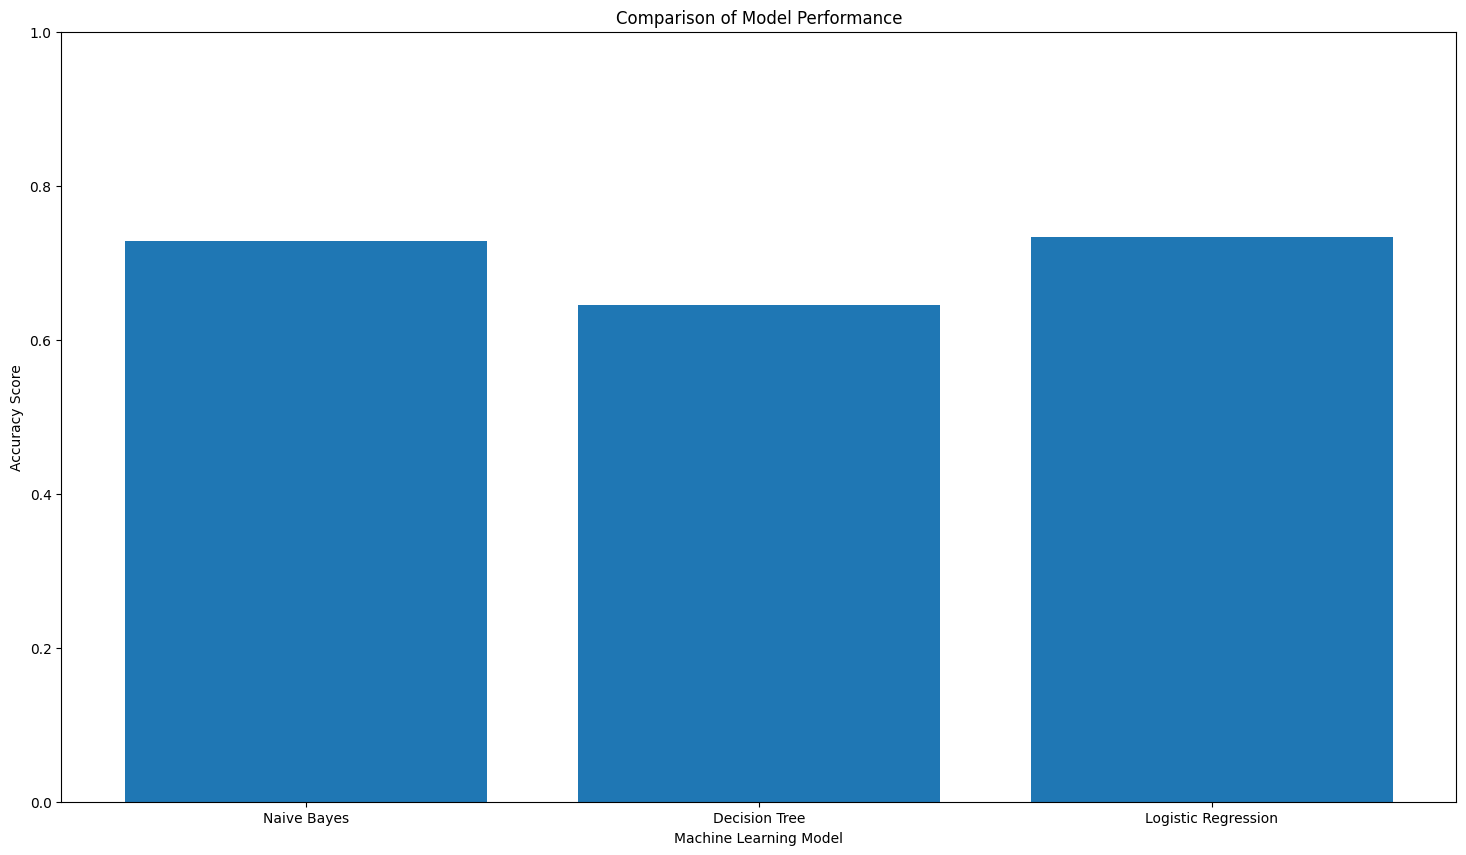

In [ ]:
# Model comparision
# Accuracy scores for different models
accuracies = [acc_nb, 
              dt_model.score(X_test_tfidf, y_test), 
               accuracy_lr]

# Model names
models = ['Naive Bayes',  'Decision Tree',   'Logistic Regression']

# Create a bar chart to compare the performance of different models
plt.figure(figsize=(18, 10))
plt.bar(models, accuracies)
plt.ylim([0, 1])
plt.title('Comparison of Model Performance')
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy Score')
plt.show()

In [ ]:
# Predict the category of a given comment
comment = "I love data science but hate data engineering"
comment_tfidf = tfidf_vectorizer.transform([comment.lower()])
nb_prediction = nb.predict(comment_tfidf)[0]
print('Naive bayes prediction:', nb_prediction)
dt_prediction = dt_model.predict(comment_tfidf)[0]
print("Decision Tree prediction:", dt_prediction)
lr_prediction = lr_model.predict(comment_tfidf)[0]
print("Logistic Regression prediction:", lr_prediction)

Naive bayes prediction: datascience
Decision Tree prediction: datascience
Logistic Regression prediction: datascience
